In [1]:
import pandas as pd

In [2]:
rent = pd.read_csv('rent-ideal.csv')

In [3]:
rent.head(5)

,bedrooms,bathrooms,latitude,longitude,price
0,1,1.0,40.7108,-73.9539,2400
1,2,1.0,40.7513,-73.9722,3800
2,2,1.0,40.7575,-73.9625,3495
3,3,1.5,40.7145,-73.9425,3000
4,0,1.0,40.7439,-73.9743,2795


In [4]:
prices = rent['price']
avg_rent = prices.mean()
print(f"Average rent is {avg_rent:.0f}")

Average rent is 3438


In [5]:
# data aggregation with pandas
by_baths = rent.groupby(['bathrooms']).mean()
by_baths = by_baths.reset_index() # find out what quirk was being overcome here
print(by_baths[['bathrooms', 'price']]) # print just num baths, avg price

   bathrooms        price
0        0.0  3144.870000
1        1.0  3027.007118
2        1.5  4226.336449
3        2.0  5278.595739
4        2.5  6869.047368
5        3.0  6897.974576
6        3.5  7635.357143
7        4.0  7422.888889
8        4.5  2050.000000
9       10.0  3600.000000


In [6]:
import matplotlib.pyplot as plt

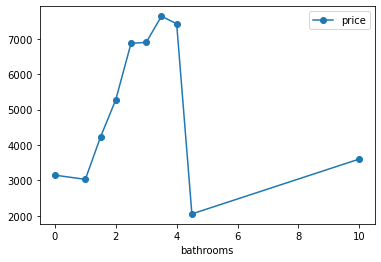

In [7]:
by_baths.plot.line('bathrooms', 'price', style='-o')
plt.show()

In [8]:
X, y = rent[['bedrooms', 'bathrooms', 'latitude', 'longitude']], rent['price']

In [9]:
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
rf = RandomForestRegressor(n_estimators=10) # use 10 trees

In [12]:
rf.fit(X, y)

RandomForestRegressor(n_estimators=10)

In [13]:
unknown_x = [2, 1, 40.7957, -73.97] # 2 bedrooms, 1 bathroom

In [14]:
# predict expects a list of feature vectors
predicted_y = rf.predict([unknown_x])

In [15]:
predicted_y

array([4448.82671164])

In [16]:
from sklearn.metrics import mean_absolute_error

In [17]:
predictions = rf.predict(X)

In [18]:
predictions

array([2394.69090909, 3811.58619048, 3349.93162755, ..., 1847.14285714,
       4195.        , 4366.73069264])

In [19]:
e = mean_absolute_error(y, predictions)

In [20]:
ep = e * 100.00/y.mean()

In [21]:
print(f"${e:.0f} average error; {ep:.2f}% error")

$189 average error; 5.50% error


We can expect the predicted price of an apartment in the training data to be off by about $189. This is the training error

In [22]:
X, y = rent[['latitude', 'longitude']], rent['price']
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)

RandomForestRegressor()

In [23]:
location_e = mean_absolute_error(y, rf.predict(X))
location_ep = location_e * 100.0/y.mean()
print(f"${location_e:.0f} average error; {location_ep:.2f}% error")

$519 average error; 15.09% error


Using just the location, and no information about the number of bedrooms or bathrooms, the average prediction error on the training set is $519. Thats more than the error with all the features but still not bad.

In [24]:
5.51/15.08*100

36.53846153846153

The difference between the 5.51% error for the model fit on all features and 15.08% error for the model fit on location alone means that by dropping the number of bedrooms and bathrooms, model prediction accuracy is reduced by 36.53%

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X, y = rent[['bedrooms', 'bathrooms', 'latitude', 'longitude']], rent['price']
# 20% of the data goes into test set, 80% into training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)

validation_e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"${validation_e:.0f} average error; {validation_e * 100.0/y.mean():.2f}% error")

$300 average error; 8.73% error


- Comparing the average error \$305 from the validation set and the \\$189 training error, we see that the model performs much better on the training data. The training data is analogous to the score we'd get on a quiz for which we'd seen the answers beforehand

In [28]:
# Fiddling with model hyper-parameters - increasing number of trees
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

e = mean_absolute_error(y_test, rf.predict(X_test))
print(f"{e:.0f} average error; {e * 100/y.mean():.2f}% error")

296 average error; 8.61% error


In [29]:
from rfpimp import *

/home/grenouille/anaconda3/envs/tf_env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [30]:
# print out feature importances using rfpimp
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
I = importances(rf, X_test, y_test)
I

,Importance
Feature,
bedrooms,0.564061
longitude,0.522910
latitude,0.445653
bathrooms,0.406876


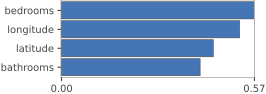

In [31]:
# visualize importances to see relative differences
plot_importances(I, color='#4575b4', vscale=1.8)

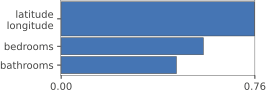

In [32]:
# Group latitude and longitude together as a meta-feature when computing importances
I = importances(rf, X_test, y_test,
               features = ['bedrooms', 'bathrooms', ['latitude', 'longitude']])
plot_importances(I, color='#4575b4', vscale=1.8)

- We can conclude that New Yorkers care the least about bathrooms because that feature has the least predictive power compared to other features.
- Together latitude and longitude have a great deal of predictive power

<hr style="border:2px solid black"></hr>

# Jenga Voila class example

In [33]:
import numpy as np
import pandas as pd

In [34]:
ts = pd.Series(np.random.randn(1000))

In [35]:
ts = ts.cumsum()

<AxesSubplot:>

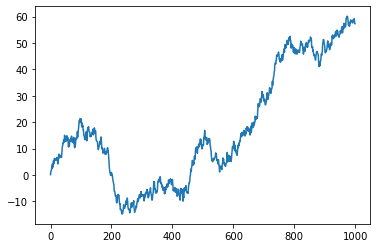

In [36]:
ts.plot()

- enable extension on the anaconda shell prompt
```sh
jupyter labextension install bqplot
```

In [37]:
from bqplot import pyplot as plt

In [38]:
import numpy as np

In [39]:
plt.figure(1, title='Line Chart')

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, scale_x=LinearScale(allow_padding=False,…

In [40]:
np.random.seed(9)

In [41]:
n = 200
x = np.linspace(0.0, 10.0, n)
y = np.cumsum(np.random.randn(n))

In [42]:
plt.plot(x,y)
plt.show()

#### END OF JENGA SECTION

<hr style="border:2px solid black"></hr>

# Predicting breast cancer

In [43]:
from sklearn.datasets import load_breast_cancer

In [44]:
import pandas as pd

In [45]:
cancer = load_breast_cancer()

X = cancer.data
y = cancer.target
df = pd.DataFrame(X, columns=cancer.feature_names)

In [46]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:
# Let's restrict ourselves to 7 key features for simplicity
features = ['radius error', 'texture error', 'concave points error',
            'symmetry error', 'worst texture', 'worst smoothness',
            'worst symmetry']
df_copy = df[features] # select just these features
print("target[0:30] = ", y[:30]) # show 30 values of malignant/benign target
df_copy.head()

target[0:30] =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]


,radius error,texture error,concave points error,symmetry error,worst texture,worst smoothness,worst symmetry
0,1.0950,0.9053,0.01587,0.03003,17.33,0.1622,0.4601
1,0.5435,0.7339,0.01340,0.01389,23.41,0.1238,0.2750
2,0.7456,0.7869,0.02058,0.02250,25.53,0.1444,0.3613
3,0.4956,1.1560,0.01867,0.05963,26.50,0.2098,0.6638
4,0.7572,0.7813,0.01885,0.01756,16.67,0.1374,0.2364


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [49]:
# On the entire feature set
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.15)

cl_full = RandomForestClassifier(n_estimators=300)
cl_full.fit(X_train, y_train)
validation_e = cl_full.score(X_test, y_test)
print(f"{validation_e*100:.2f}% correct")

94.19% correct


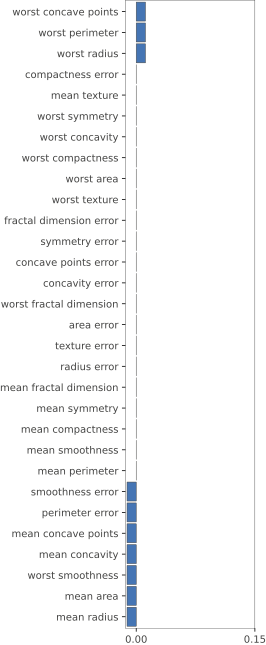

In [50]:
from rfpimp import *
I = importances(cl_full, X_test, y_test)
plot_importances(I, color='#4575b4', vscale=1.4)

- worst concave points, worst texture, mean texture, area error are all equally the most important features for distinguishing malignant versus benign masses
- Apparently on the full feature sets there are features that contribute negatively to the prediction namely:
    - mean concavity
    - worst radius
    - worst smoothness
    - mean smoothness
    - worst concavity
    - concavity error
    - mean concave points
    - worst perimeter
    - mean radius

In [51]:
# On the core feature set
X_train, X_test, y_train, y_test = train_test_split(df_copy, y, test_size=0.15)

cl = RandomForestClassifier(n_estimators=300)
cl.fit(X_train, y_train)
validation_e = cl.score(X_test, y_test)
print(f"{validation_e*100:.2f}% correct")

91.86% correct


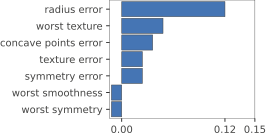

In [52]:
from rfpimp import *
I = importances(cl, X_test, y_test)
plot_importances(I, color='#4575b4', vscale=1.4) # vscale -> vertical scale

- Based on the 7 features selected, radius error is the most important for distinguishing between malignant versus benign masses

# Classifying hand written digits

In [53]:
import pandas as pd

In [54]:
addr640 = pd.read_csv('data/640.csv')

In [55]:
print(addr640.digit.values)

[6 4 0]


In [56]:
addr640_value = addr640['digit']
addr640 = addr640.drop('digit', axis=1) # drop digit column

In [57]:
addr640_value.values

array([6, 4, 0])

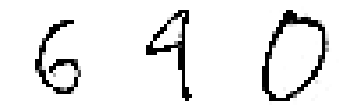

In [58]:
fig, axes = plt.subplots(1, 3)

for i, ax in enumerate(axes.flat):
    img_as_row = addr640.iloc[i].values
    img28x28 = img_as_row.reshape(28,28)
    ax.axis('off')
    ax.imshow(img28x28, cmap='binary')
plt.show()

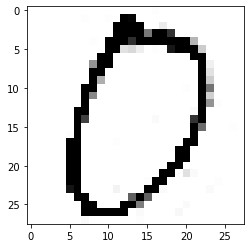

In [59]:
# represent digit 6 in the first row as an image
six_img_as_row = addr640.iloc[2].values # get the first row
img28x28 = six_img_as_row.reshape(28,28)
plt.imshow(img28x28, cmap='binary')
plt.show()

In [60]:
# representing a digit's image by printing out the pixel values
six_img_as_row[six_img_as_row>0] = 1 # convert anything between 0 and 1 to 0 or 1
six_img_as_row = six_img_as_row.astype(int)
img28x28 = six_img_as_row.reshape(28,28)
s = str(img28x28).replace(' ', '') # remove spaces
print(s)

[[0000000000000000100000000000]
[0000000100101100000000000000]
[0000000000011110010000000000]
[0000000000011111111000000000]
[0000000010111111111111000000]
[0000000000111110101111100000]
[0000000001100000000001100000]
[0000000011100000000000110000]
[0000000011000000000000110000]
[0000000011000000000000110000]
[0000000110000000000010110000]
[0000000110000000000000110000]
[0000000100000000000000111000]
[0000001100000000000001100000]
[0000001100000000100001100000]
[0000001000000000000001100010]
[0000011000000000000001000000]
[0000011000010000000011000000]
[0000011000000000000110000000]
[0000011000000000000110000000]
[0000011000000000001100000000]
[0000011000000000011011000000]
[0000011000000001110000001000]
[0000011000010001110000010000]
[0000001100000111000000000000]
[0000000110001110000010000000]
[0000000111111010000100000000]
[0000000100000010000000000000]]


In [61]:
# load our training data into a data frame
digits = pd.read_csv('data/mnist-10k-sample.csv')
images = digits.drop('digit', axis=1) # get pixel values
targets = digits['digit'] # get digit value

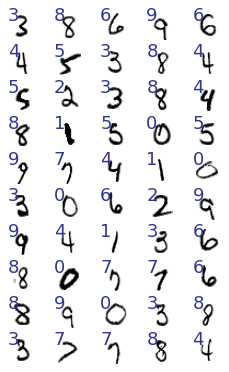

In [62]:
# plotting the first 50 images in a 10x5 grid
fig, axes = plt.subplots(10, 5, figsize=(4, 6.5)) # make a 10 x 5 grid of plots

for i, ax in enumerate(axes.flat):
    img_as_row = images.iloc[i].values
    img28x28 = img_as_row.reshape(28,28)
    ax.axis('off') # don't show x & y axis
    ax.imshow(img28x28, cmap='binary')
    ax.text(0, 8, targets[i], color='#313695', fontsize=18) # annotate the actual number represented by the image
plt.show()

In [63]:
# classifying test digit 6-4-0
from sklearn.ensemble import RandomForestClassifier

cl = RandomForestClassifier(n_estimators=900, n_jobs=-1)
cl.fit(images, targets)
pred = cl.predict(addr640)
print(pred)

[6 7 0]


In [64]:
# Level of confidence of the model prediction
import numpy as np;
np.set_printoptions(precision=3)

digit_values = range(10)
prob = cl.predict_proba(addr640)
prob_for_2nd_digit = prob[1]
print(prob_for_2nd_digit)

[0.01  0.107 0.088 0.151 0.1   0.082 0.054 0.244 0.026 0.138]


In [65]:
pred_digit = np.argmax(prob_for_2nd_digit)
print(f"Predicted ditit is {pred_digit}")

Predicted ditit is 7


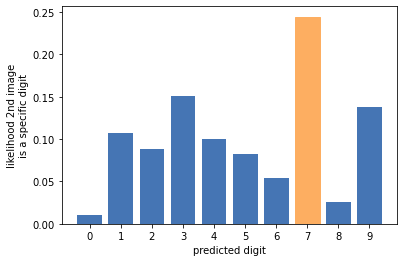

In [66]:
# visual representation of prediction probability
pred_digit = np.argmax(prob_for_2nd_digit)
bars = plt.bar(digit_values, prob_for_2nd_digit, color="#4575b4")
bars[pred_digit].set_color("#fdae61")
plt.xlabel("predicted digit")
plt.xticks(digit_values)
plt.ylabel("likelihood 2nd image\nis a specific digit")
plt.show()

- The model predicts a 7 for the 2nd test digit by a wide margin. This is concerning because it doesn't match our expectations. From a human perspective, the 2nd digit is 4 or 9, definitely not a 7
- The model makes predictions solely on the experience(training data) we gave it. That's a big hint we should take another look at the data, focusing just on the images known to be 4's

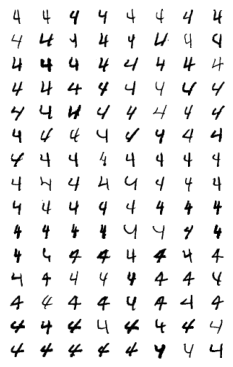

In [67]:
# isolating the images for 4's and displaying the first 120 in a grid
fours = images[targets==4] # find all "4" images

fig, axes = plt.subplots(15, 8, figsize=(4, 6.5))
for i, ax in enumerate(axes.flat):
    img = fours.iloc[i,:].values.reshape(28,28)
    ax.axis('off')
    ax.imshow(img, cmap='binary')

- It is clear that none of our training images look like the 4 in our test images. The horizontal lines in training images cross the vertical lines whereas the horizontal line in our test image terminates at the vertical line.
- This explains why our model did not predict a 4

In [68]:
# training our model on the entire digits dataset
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

digits = pd.read_csv('data/mnist_train.csv')
images = digits.drop('label', axis=1)
targets = digits['label']

cl = RandomForestClassifier(n_estimators=900, n_jobs=-1)
cl.fit(images, targets)
pred = cl.predict(addr640)
print(f"Predicted value: {pred}")

Predicted value: [7 7 7]


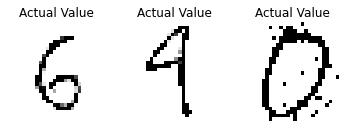

In [129]:
fig, axes = plt.subplots(1, 3)

for i, ax in enumerate(axes.flat):
    img_as_row = addr640.iloc[i].values
    img28x28 = img_as_row.reshape(28,28)
    ax.axis('off')
    ax.imshow(img28x28, cmap='binary')
    ax.set_title("Actual Value")
plt.show()

In [131]:
# Evaluating the accuracy of the Random Forest model
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.2)

cl = RandomForestClassifier(n_estimators=900, n_jobs=-1)
cl.fit(X_train, y_train)
rf_acc = cl.score(X_test, y_test)
print(f'The accuracy score for the Random Forest Model is {rf_acc:.100%}')

The accuracy score for the Random Forest Model is 96.7916666666666714036182384006679058074951171875000000000000000000000000000000000000000000000000000000%


# kNN Classifier

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn = KNeighborsClassifier(n_neighbors=7)

In [72]:
knn.fit(images, targets)

KNeighborsClassifier(n_neighbors=7)

In [73]:
predicted = knn.predict(X=addr640)

In [74]:
predicted

array([1, 1, 1])

In [75]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(predicted, addr640_value.values)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 0.00


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.2)

In [78]:
knn = KNeighborsClassifier(n_neighbors=7)

In [79]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [80]:
y_pred = knn.predict(X_test)

In [81]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}")

Accuracy: 96.91


# Neural Networks

In [82]:
images.shape

(60000, 784)

In [83]:
targets.shape

(60000,)

In [84]:
images.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
img = images.to_numpy() # convert the images into a numpy array

In [86]:
img.shape

(60000, 784)

In [87]:
img = img.reshape((60000,28,28,1))

In [88]:
img.shape

(60000, 28, 28, 1)

In [89]:
tgts = targets.to_numpy()  # convert the targets into a numpy array

In [90]:
tgts

array([5, 0, 4, ..., 5, 6, 8])

In [91]:
from tensorflow.keras.utils import to_categorical

In [128]:
# Convert the targets into a numpy array of length 9 where all other values
# are 0 except for the current target
# e.g. 6 will be represented as array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)
targets_numpy = to_categorical(tgts)

In [93]:
targets_numpy.shape

(60000, 10)

In [94]:
addr640_numpy = addr640.to_numpy()

In [95]:
addr640_numpy.shape

(3, 784)

In [96]:
addr640_nval = to_categorical(addr640_value)

In [97]:
addr640_nval.shape

(3, 7)

In [98]:
from tensorflow.keras.models import Sequential

In [99]:
cnn = Sequential()

In [100]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [101]:
# add the convolution layer
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

In [102]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [103]:
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

In [104]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

In [105]:
cnn.add(Flatten())

In [106]:
cnn.add(Dense(units=128, activation='relu'))

In [107]:
cnn.add(Dense(units=10, activation='softmax'))

In [108]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

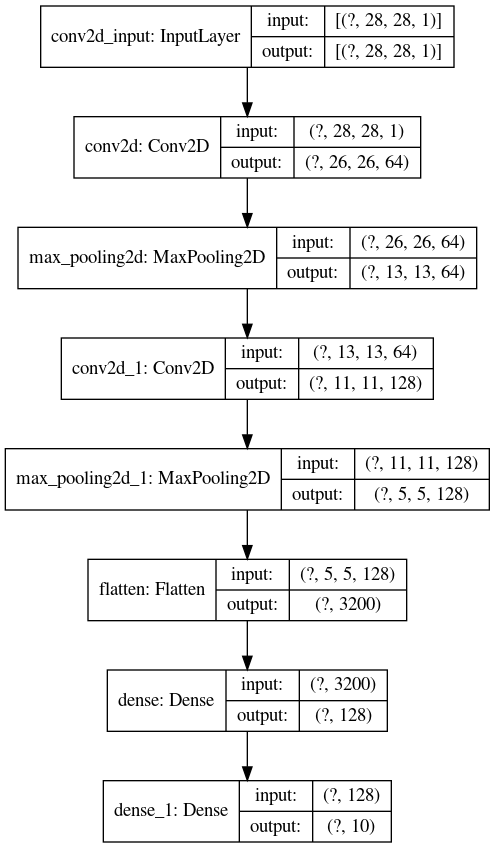

In [110]:
# Visualizing the model's structure
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='convnet.png')

In [111]:
# compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [112]:
# Training the model
cnn.fit(img, targets_numpy, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 77s 92ms/step - loss: 0.4552 - accuracy: 0.9396 - val_loss: 0.0759 - val_accuracy: 0.9773
Epoch 2/10
844/844 [==============================] - 69s 82ms/step - loss: 0.0742 - accuracy: 0.9781 - val_loss: 0.0740 - val_accuracy: 0.9785
Epoch 3/10
844/844 [==============================] - 69s 82ms/step - loss: 0.0609 - accuracy: 0.9821 - val_loss: 0.0746 - val_accuracy: 0.9803
Epoch 4/10
844/844 [==============================] - 67s 79ms/step - loss: 0.0448 - accuracy: 0.9869 - val_loss: 0.0534 - val_accuracy: 0.9860
Epoch 5/10
844/844 [==============================] - 68s 80ms/step - loss: 0.0455 - accuracy: 0.9867 - val_loss: 0.0575 - val_accuracy: 0.9867
Epoch 6/10
844/844 [==============================] - 67s 79ms/step - loss: 0.0421 - accuracy: 0.9876 - val_loss: 0.0771 - val_accuracy: 0.9832
Epoch 7/10
844/844 [==============================] - 69s 81ms/step - loss: 0.0394 - accuracy: 0.9891 - val_loss: 0.0558 - val_accuracy:

In [113]:
# Evaluating the model
loss, accuracy = cnn.evaluate(img, targets_numpy)

1875/1875 [==============================] - 23s 12ms/step - loss: 0.0333 - accuracy: 0.9906


In [114]:
loss

0.03330846503376961

In [115]:
accuracy

0.9905999898910522

In [116]:
addr640_numpy = addr640_numpy.reshape((3,28,28,1))

In [117]:
# Making predictions
predictions = cnn.predict(addr640_numpy)

In [118]:
predictions

array([[0.099, 0.106, 0.097, 0.099, 0.098, 0.099, 0.097, 0.102, 0.111,
        0.092],
       [0.097, 0.108, 0.098, 0.099, 0.097, 0.099, 0.097, 0.104, 0.111,
        0.091],
       [0.099, 0.106, 0.098, 0.099, 0.098, 0.098, 0.097, 0.102, 0.112,
        0.092]], dtype=float32)

In [119]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 9.9264264107%
1: 10.6023095548%
2: 9.7056806087%
3: 9.8606608808%
4: 9.7837246954%
5: 9.8626829684%
6: 9.7471348941%
7: 10.1864971220%
8: 11.1312784255%
9: 9.1936074197%


In [125]:
predictions

array([[0.099, 0.106, 0.097, 0.099, 0.098, 0.099, 0.097, 0.102, 0.111,
        0.092],
       [0.097, 0.108, 0.098, 0.099, 0.097, 0.099, 0.097, 0.104, 0.111,
        0.091],
       [0.099, 0.106, 0.098, 0.099, 0.098, 0.098, 0.097, 0.102, 0.112,
        0.092]], dtype=float32)